# Investigating Fandango Movie Ratings

In 2015, Walt Hickey analyzed Fandango movie ratings and found the data to be left skewed indicating mostly favorable ratings of movies. In addition, he discovered that ratings in the html of the website were lower than the displayed ratings. This project will analyze more recent data from Fandango to see if there has been any change in the rating system.

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.options.display.max_columns = 999

In [2]:
before = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


Selecting just the columns related to Fandango ratings:

In [5]:
before_ratings = before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
after_ratings = after[['movie', 'year', 'fandango']]

In [6]:
before_ratings.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [7]:
after_ratings.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


## Population of interest

We would like to see if there is any change in Fandango's rating system before and after Hickey's article.

The ratings from the first dataset include every film that had a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

The second dataset contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. As of March 22, 2017, the ratings were up to date.

The criteria for sampling the films was not random in either case. In the first dataset, inclusion of a film was dependent on every data source having that film and also having 30 fan ratings. In the second dataset, only the most popular films were selected. Because the datasets were not random and representative, we cannot use this data to see if there is any change in Fandango's rating system.

## Changing Goals

The new goal will be to see if there is any difference in Fandango ratings from 2015 to 2016 for popular films. Let's first check if to see if both datasets contain popular films.

The first dataset has number of user ratings. We will use the criteria that popular films should have at least 30 ratings as Hickey did with his analysis. Let's verify that there aren't any films in the dataset with less than 30 ratings.

In [8]:
len(before_ratings[before_ratings['Fandango_votes'] <= 30])

0

The second dataset doesn't have the number of user ratings. Instead, we can randomly sample 10 films and manually check on the Fandango website.

In [9]:
fandango_sample = after_ratings.sample(10, random_state=1)
fandango_sample.head(10)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Fandango has recently removed their own rating system from their website. Using the wayback machine we were able to compile this list of ratings.

In [10]:
fandango_sample['Fandango_votes'] = [2247, 7271, 493, 5263, 13400, 17, 127, 11877, 500, 35057]
fandango_sample.head(10)

,movie,year,fandango,Fandango_votes
108,Mechanic: Resurrection,2016,4.0,2247
206,Warcraft,2016,4.0,7271
106,Max Steel,2016,3.5,493
107,Me Before You,2016,4.5,5263
51,Fantastic Beasts and Where to Find Them,2016,4.5,13400
33,Cell,2016,3.0,17
59,Genius,2016,3.5,127
152,Sully,2016,4.5,11877
4,A Hologram for the King,2016,3.0,500
31,Captain America: Civil War,2016,4.5,35057


90 percent of films had over 30 ratings so we can be confident that this dataset is mostly made up of popular films.

## Isolating films to 2015 and 2016 Releases

There are several films in each dataset that aren't either 2015 or 2016. We will isolate the first dataset to include only 2015 films and the second dataset will only contain 2016 films.

In [11]:
boolean_index = before_ratings['FILM'].str.contains('2015')
ratings_2015 = before_ratings[boolean_index]

ratings_2015.dtypes

FILM                     object
Fandango_Stars          float64
Fandango_Ratingvalue    float64
Fandango_votes            int64
Fandango_Difference     float64
dtype: object

In [12]:
ratings_2016 = after_ratings[after_ratings['year'] == 2016]

## Comparing Distribution Shapes for 2015 and 2016

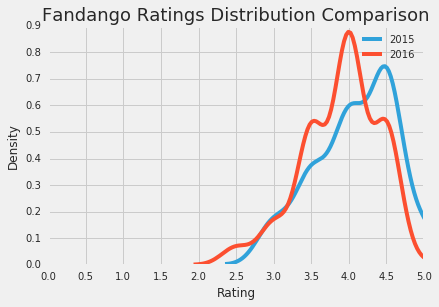

In [33]:
plt.style.use('fivethirtyeight')
ax1 = sns.kdeplot(ratings_2015['Fandango_Stars'])
ax1 = sns.kdeplot(ratings_2016['fandango'])
ax1.set_title('Fandango Ratings Distribution Comparison', fontsize=18)
ax1.set(xlim=(0, 5), xticks=[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.legend(labels=['2015', '2016'])
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Density', fontsize=12)

- The 2016 distribution has shifted left
- Both distributions are left skewed
- Movies in 2016 where rated lower than in 2015

Fandango clearly changed their ratings from 2015 to 2016 for popular movies. Both curves are left skewed indicating that most ratings on Fandango are high.

In [41]:
(ratings_2015['Fandango_Stars'].value_counts() / len(ratings_2015) * 100).sort_index()

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [38]:
(ratings_2016['fandango'].value_counts() / len(ratings_2016)).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

- About 65% of ratings in both years were >= 4.0
- There were 5% 5.0 ratings in 2015 compared with 0.5% in 2016
- There were no ratings below 3.0 in 2015, while 2016 had no ratings below 2.5
- Most ratings were 4.5 in 2015 compared with 4.0 in 2016

It's range of ratings was increased slightly in 2016 to including a low of 2.5. The majority of ratings also shifted from 4.5 to 4.0. It's clear there was a change between the two years.

In [61]:
stats = pd.DataFrame()
stats.loc['2015', 'mean'] = ratings_2015['Fandango_Stars'].mean()
stats.loc['2015', 'median'] = ratings_2015['Fandango_Stars'].median()
stats.loc['2015', 'mode'] = ratings_2015['Fandango_Stars'].mode()[0]

stats.loc['2016', 'mean'] = ratings_2016['fandango'].mean()
stats.loc['2016', 'median'] = ratings_2016['fandango'].median()
stats.loc['2016', 'mode'] = ratings_2016['fandango'].mode()[0]

stats.head()

,mean,median,mode
2015,4.085271,4.0,4.5
2016,3.887435,4.0,4.0


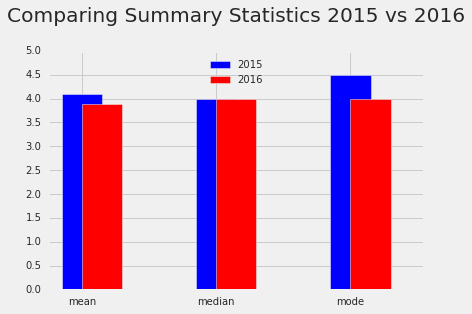

In [88]:
plt.style.use('fivethirtyeight')
stats.loc['2015'].plot.bar(color='blue', align='center', width=0.3, rot=0)
stats.loc['2016'].plot.bar(color='red', align='edge', width=0.3, rot=0)

plt.ylim((0, 5))
plt.yticks(np.arange(0, 5.1, 0.5))
plt.title('Comparing Summary Statistics 2015 vs 2016', y=1.1)
plt.legend(loc='upper center')

- The mean shifted down in 2016
- The median stayed the same
- The mode shifted down in 2016

From this data, we can see that the ratings system was different from 2015 to 2016. We could confirm this finding by selecting another sample from 2016 to analyze. 